In [61]:
%who

add_cyclic_point	 agcd_info	 alldata_dict	 aspect	 awra_info	 ccrs	 cfeature	 chirps_info	 cmap	 
cticker	 d	 da	 da_plot	 data_dir	 draw_spatial_plot	 draw_spatial_plot_12panels	 draw_spatial_plot_3panels	 ds	 
figname_prefix	 fname	 fname_prefix	 get_da	 gleam_info	 glob	 lat_size	 levels	 lon_size	 
main_title	 mswep_info	 np	 out_dir	 pd	 plot_list	 plt	 regrid_all_from_list	 save_monthly_data	 
subplot_title	 sys	 time_slice	 vname	 xe	 xr	 year	 


In [2]:
! ls -l /g/data/w97/ad9701/drought_2017to2020/precip_data/SPI3_baseline_198101_202005/

total 9290616
-rw-r--r--. 1 ad9701 w97 1650786188 Mar 23 15:24 SPI3_agcd_monthly_1981_2020_set1.nc
-rw-r--r--. 1 ad9701 w97 1654716596 Mar 23 15:39 SPI3_agcd_monthly_1981_2020_set2.nc
-rw-r--r--. 1 ad9701 w97 1655641396 Mar 23 15:54 SPI3_agcd_monthly_1981_2020_set3.nc
-rw-r--r--. 1 ad9701 w97 1659583364 Mar 23 16:10 SPI3_agcd_monthly_1981_2020_set4.nc
-rw-r--r--. 1 ad9701 w97 2248259828 Mar 23 16:32 SPI3_chirps_monthly_1981_2021.nc
-rwxr-xr-x. 1 ad9701 w97  580349892 Mar 23 16:51 SPI3_mswep_monthly_1981_2020.nc
-rw-r--r--. 1 ad9701 w97       3600 Apr  1 12:56 spi_calc_gridded_agcd.R
-rw-r--r--. 1 ad9701 w97   21766589 Apr  1 15:21 spi_list_dry_byyear.pickle
-rw-r--r--. 1 ad9701 w97   21766796 Apr  1 15:21 spi_list_dry_JJAS_byyear.pickle
-rw-r--r--. 1 ad9701 w97   10336231 Apr  1 15:21 spi_list_dry_JJAS.pickle
-rw-r--r--. 1 ad9701 w97   10336329 Apr  1 15:21 spi_list_dry.pickle


In [4]:
import numpy as np
import xarray as xr
import pandas as pd
import glob
import matplotlib.pyplot as plt
%run -i drought_2017to2020/alldata_info.py

In [4]:
data_dir = '/g/data/w97/ad9701/drought_2017to2020/precip_data/SPI3_baseline_198101_202005/'

out_dir = 'figures/drought_2017to2020/precip/baseline_198101_202005/'
figname_prefix = 'spi_3m'
fname_prefix = 'spi_3m'
vname = 'SPI3'

time_slice = slice('2017-01-01', '2020-12-31')

filename = glob.glob(data_dir + 'SPI3_agcd_monthly*.nc')
ds_agcd = xr.open_mfdataset(filename)
ds_agcd = ds_agcd.sel(time = time_slice)

filename = glob.glob(data_dir + 'SPI3_mswep_monthly*.nc')[0]
ds_mswep = xr.open_dataset(filename)
ds_mswep = ds_mswep.sel(time = time_slice)

filename = glob.glob(data_dir + 'SPI3_chirps_monthly*.nc')[0]
ds_chirps = xr.open_dataset(filename)
ds_chirps = ds_chirps.sel(time = time_slice)

data_name_2 = ['mswep', 'agcd', 'chirps']
mask_list = []
for d in data_name_2:
    ds_mask = xr.open_dataset('/g/data/w97/ad9701/drought_2017to2020/precip_data/' + d + '_land_mask.nc')
    mask_list.append(ds_mask['land_mask'])
    
fig_dir = 'figures/drought_2017to2020/precip/baseline_198101_202005/'

In [83]:
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

def draw_spatial_plot_12panels(ds_list, cmap, levels, subplot_title, main_title, out_dir, out_figname, 
                               add_cbar = True, cbar_label = ''): #, unwanted_axes=None):
    npanels = len(ds_list)
    if npanels < 12:
        unwanted_axes = list(range(npanels, 12))
    else:
        unwanted_axes = None
        
    ds = ds_list[0]
    fig, axs = plt.subplots(nrows=2,ncols=6,
                            subplot_kw={'projection': ccrs.PlateCarree()},
                            figsize=(22,8)) #width, height
    axs = axs.flatten()

    xlim = [ds['lon'].values.min(), ds['lon'].values.max()]
    ylim = [ds['lat'].values.min(), ds['lat'].values.max()]

    xticks = np.arange(115,155,10)  #lon
    yticks = np.arange(-40,-10,5)   #lat

    for i in np.arange(len(ds_list)):
        #print(i)
        cs=axs[i].contourf(ds_list[i]['lon'],ds_list[i]['lat'],ds_list[i],levels,
                              transform = ccrs.PlateCarree(),
                              cmap=cmap, extend='both')   #cmap options: coolwarm,

        # Draw the coastines for each subplot
        axs[i].coastlines()
        axs[i].add_feature(cfeature.OCEAN, zorder=2, edgecolor='k', facecolor='w')
        axs[i].set_title(subplot_title[i], pad = 2)
        
        axs[i].set_ylim(ylim)
        axs[i].set_xlim(xlim)
        
        if i in [6, 7, 8, 9, 10, 11]:
            # Longitude labels
            axs[i].set_xticks(xticks, crs=ccrs.PlateCarree())
            lon_formatter = cticker.LongitudeFormatter()
            axs[i].xaxis.set_major_formatter(lon_formatter)

        if i in [0, 6]:
            # Latitude labels
            axs[i].set_yticks(yticks, crs=ccrs.PlateCarree())
            lat_formatter = cticker.LatitudeFormatter()
            axs[i].yaxis.set_major_formatter(lat_formatter)

    # Delete the unwanted axes
    if unwanted_axes is not None:
        for i in unwanted_axes:
            fig.delaxes(axs[i])

    # # Adjust the location of the subplots on the page to make room for the colorbar
    fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                        wspace=0.1, hspace=0.08)

    if add_cbar:
        # Add a colorbar axis at the bottom of the graph
        cbar_ax = fig.add_axes([0.3, 0.15, 0.4, 0.03])

        # Draw the colorbar
        cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal', label=cbar_label)

    plt.suptitle(main_title)
    plt.savefig(out_dir + out_figname)

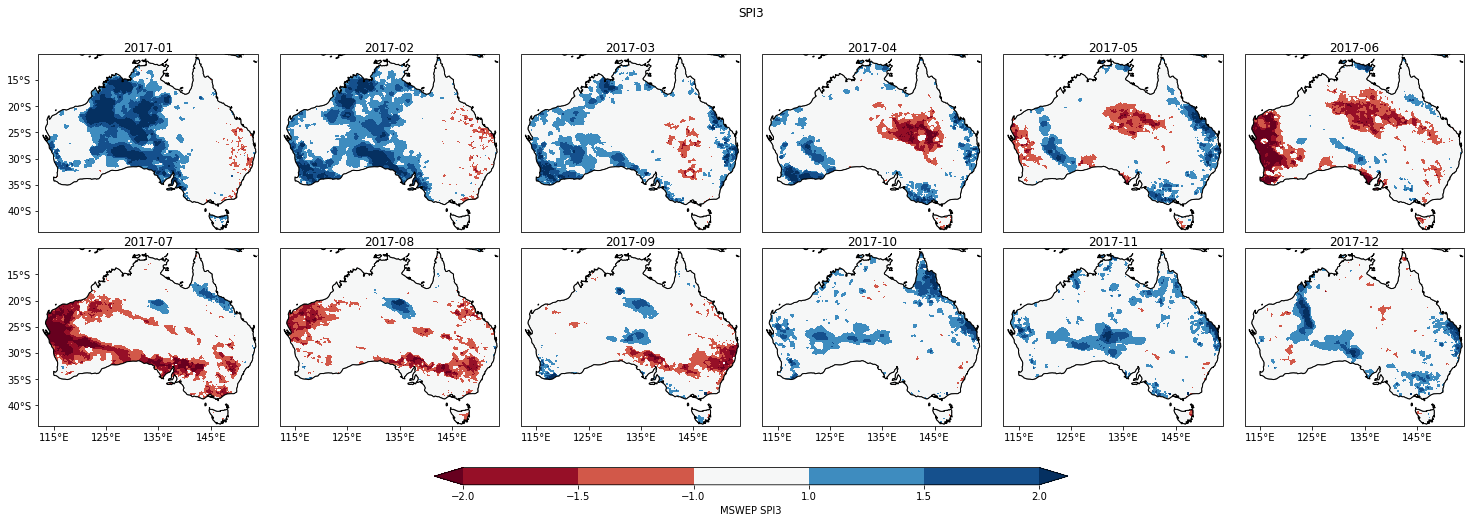

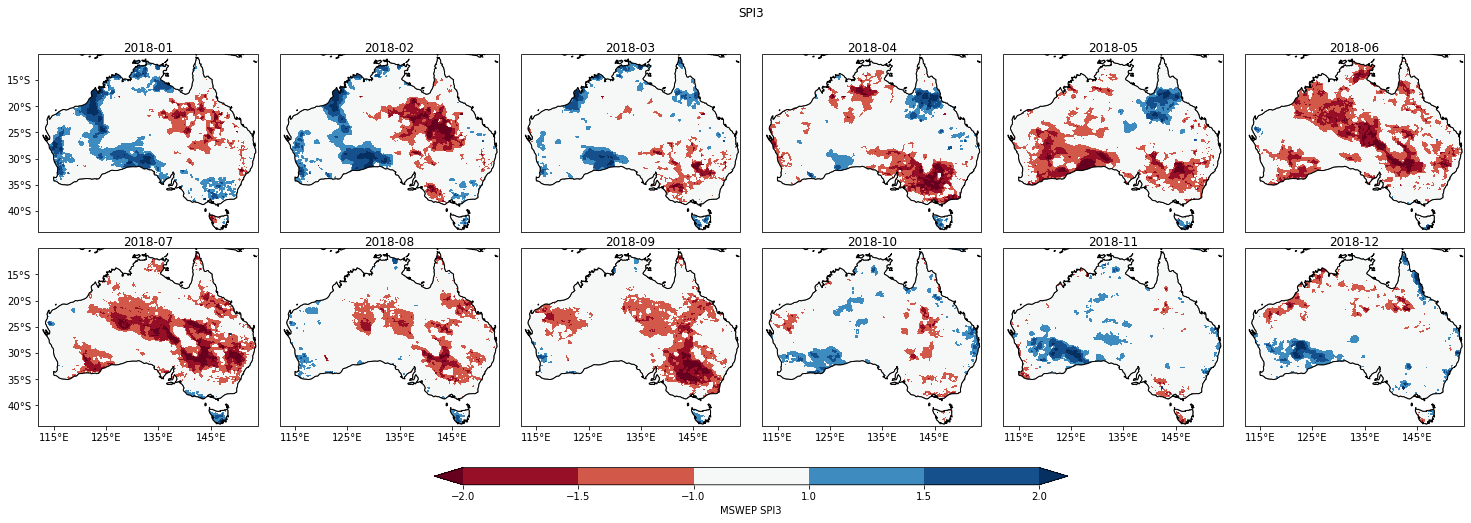

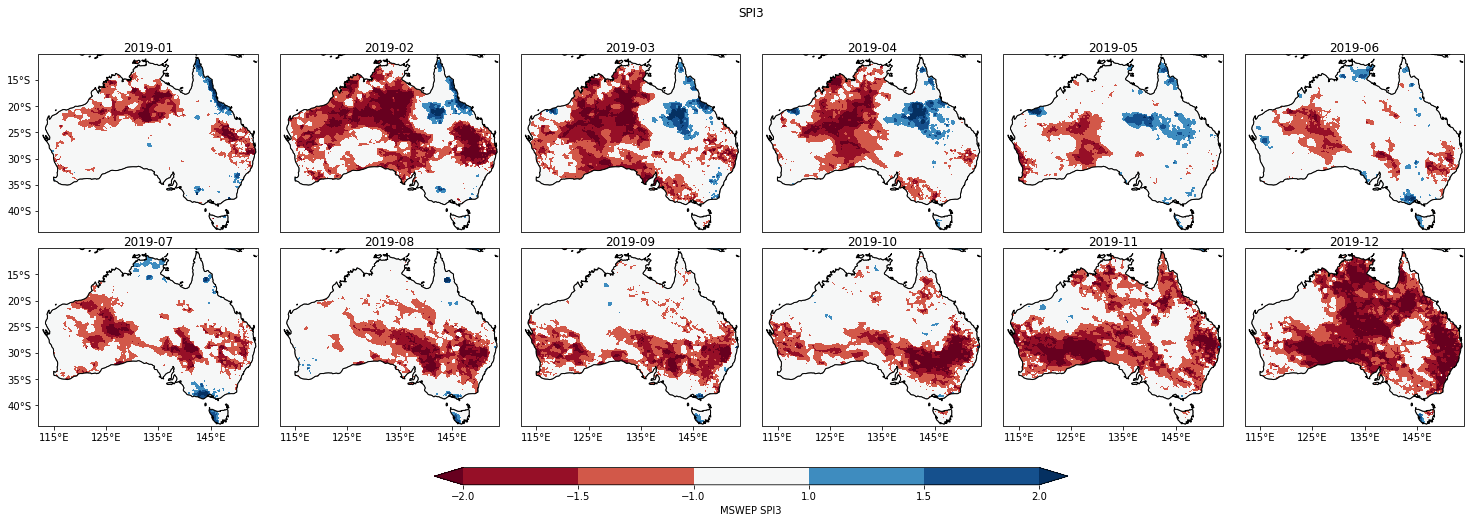

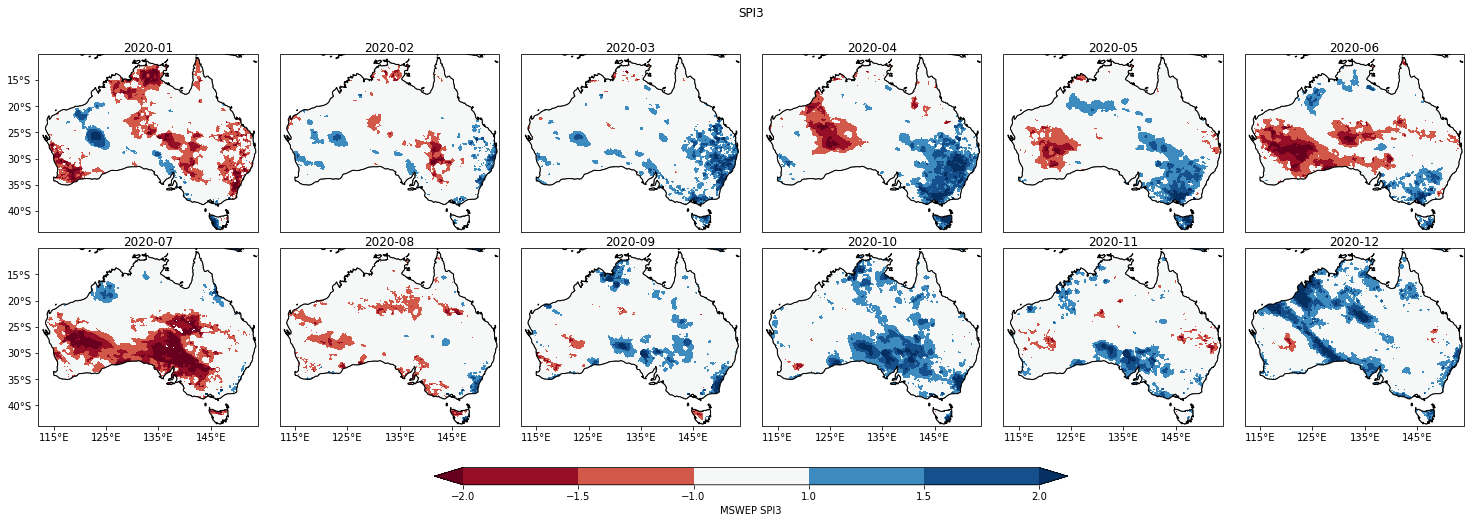

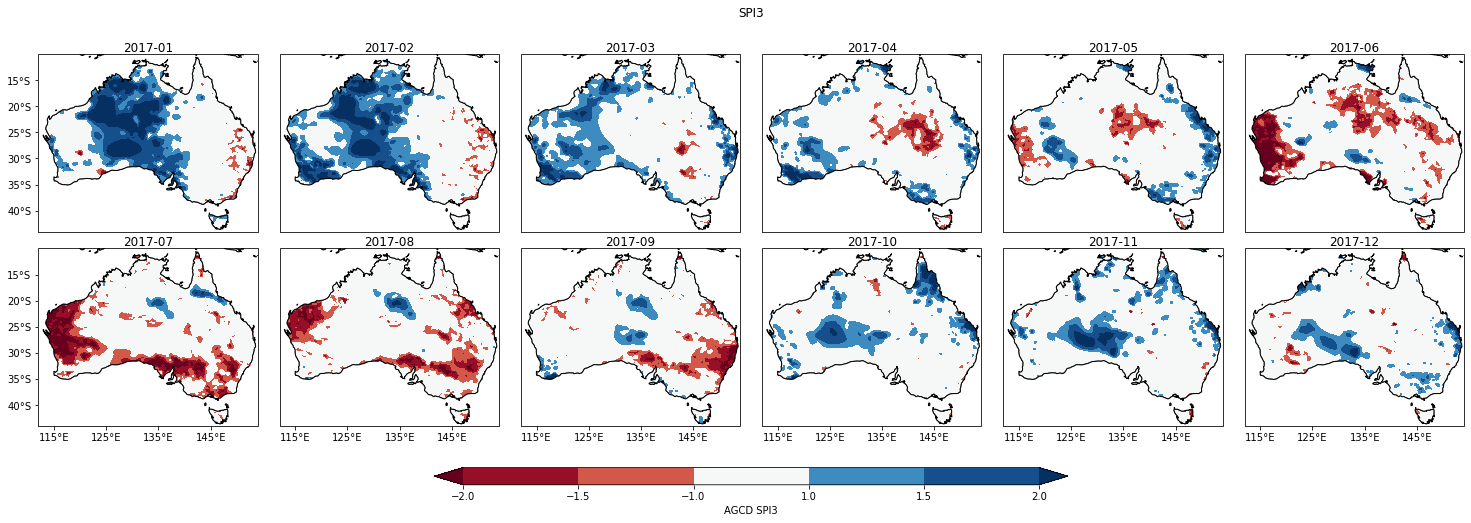

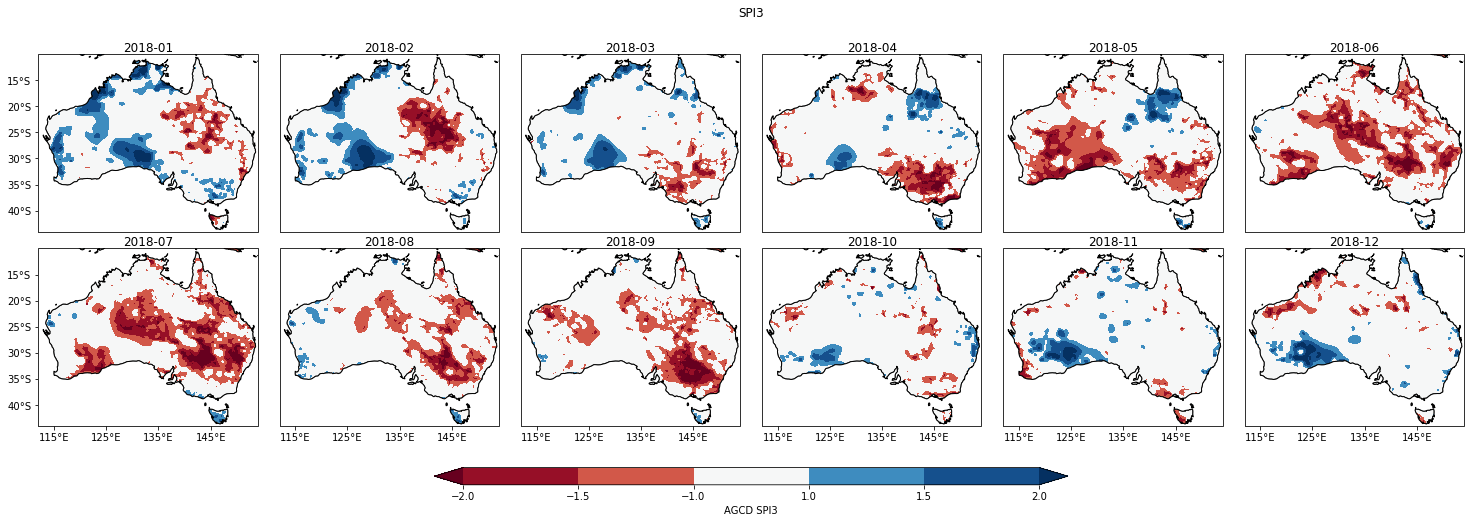

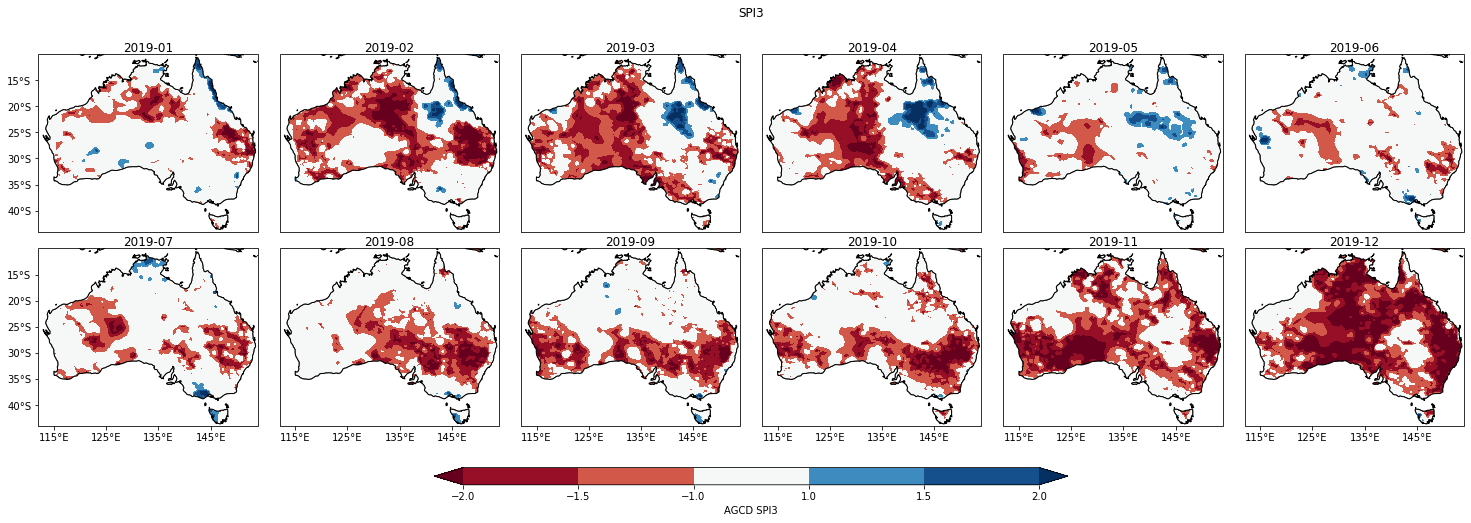

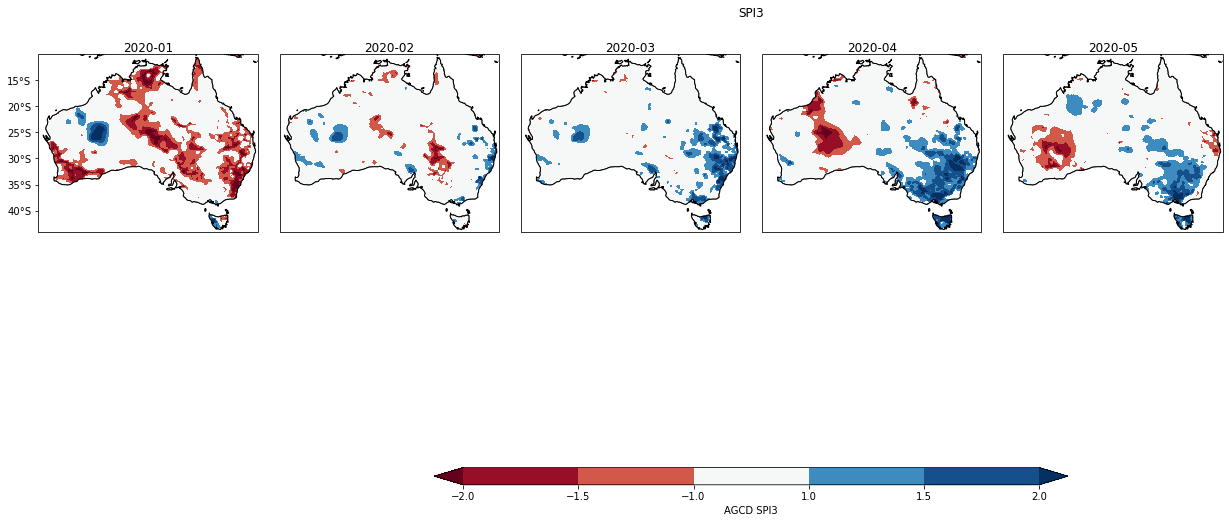

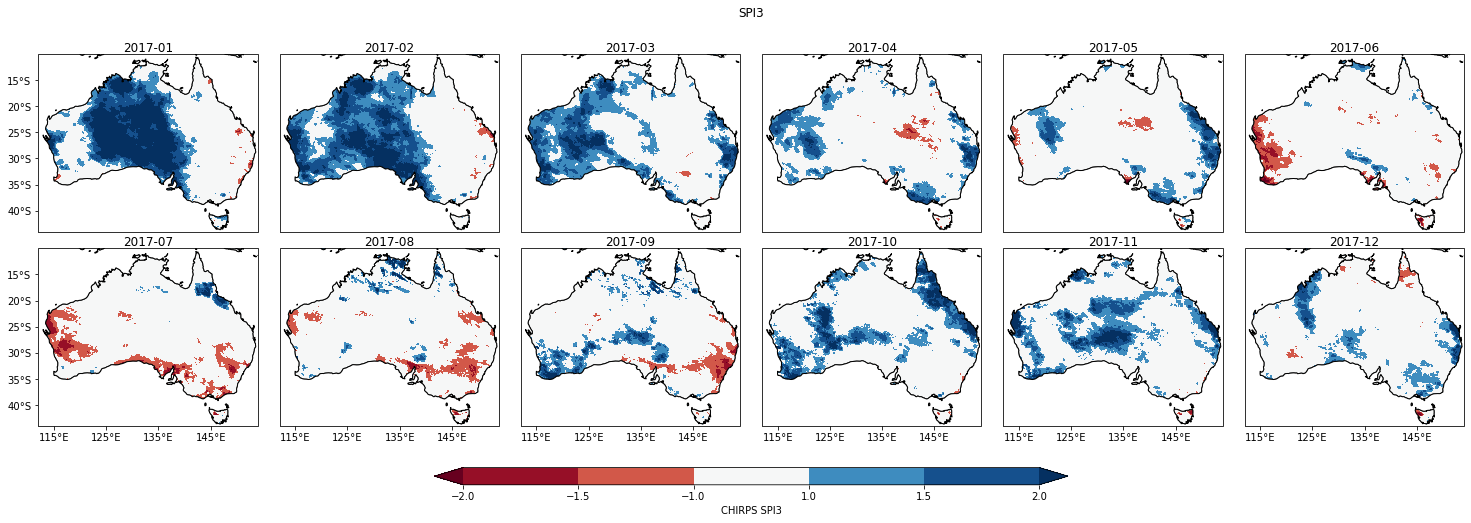

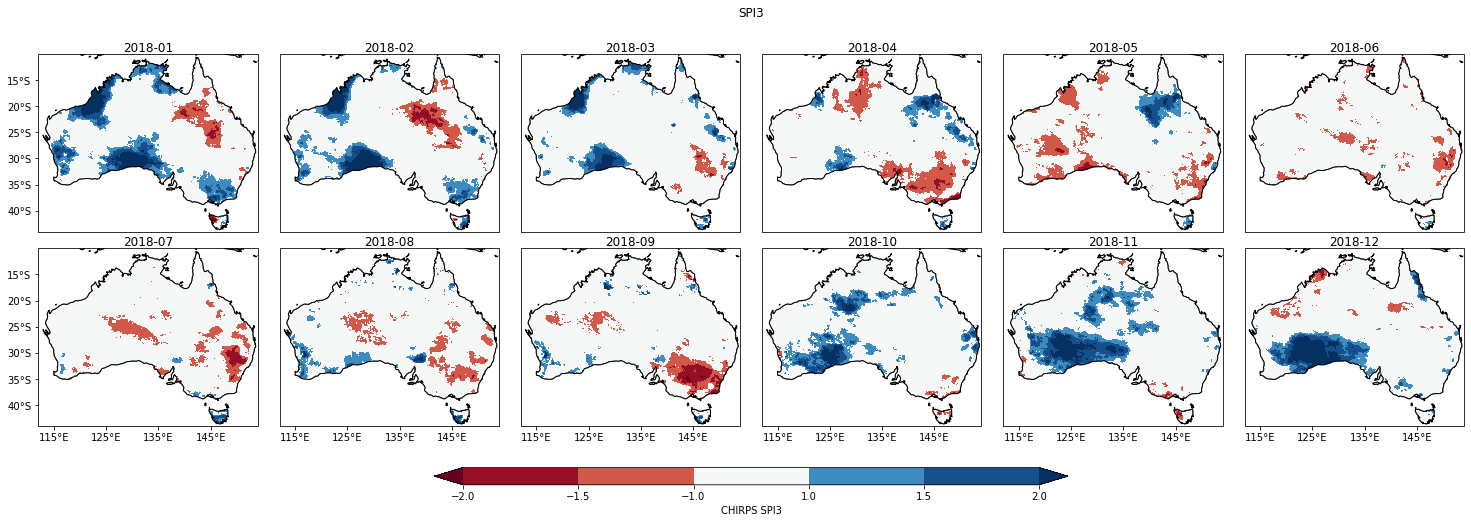

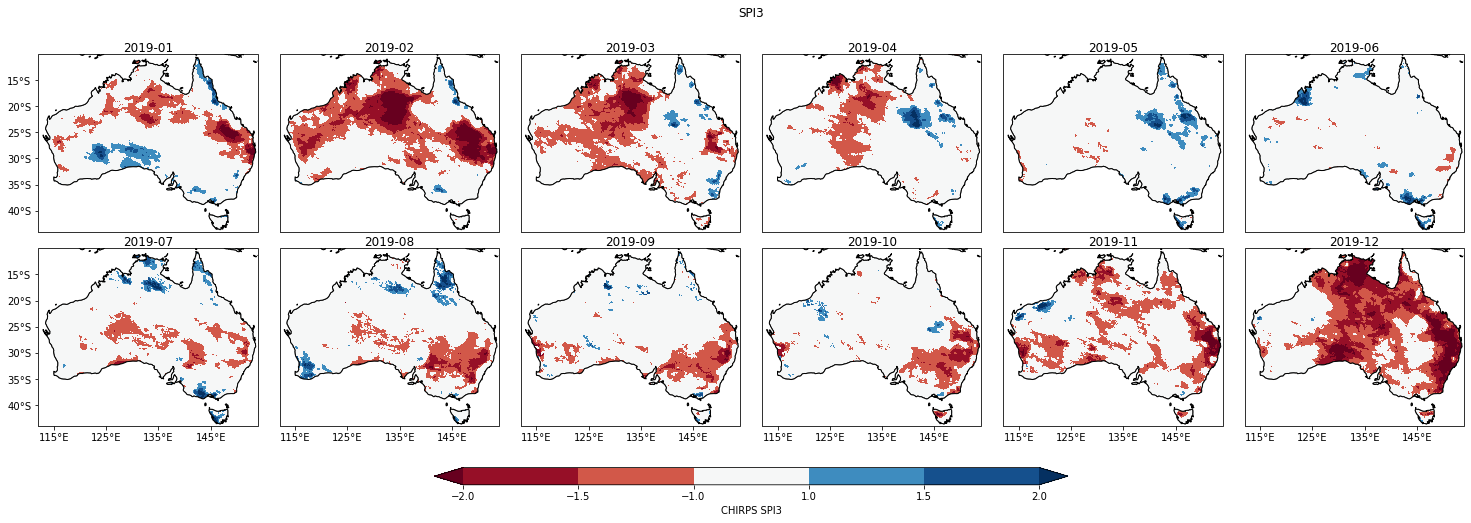

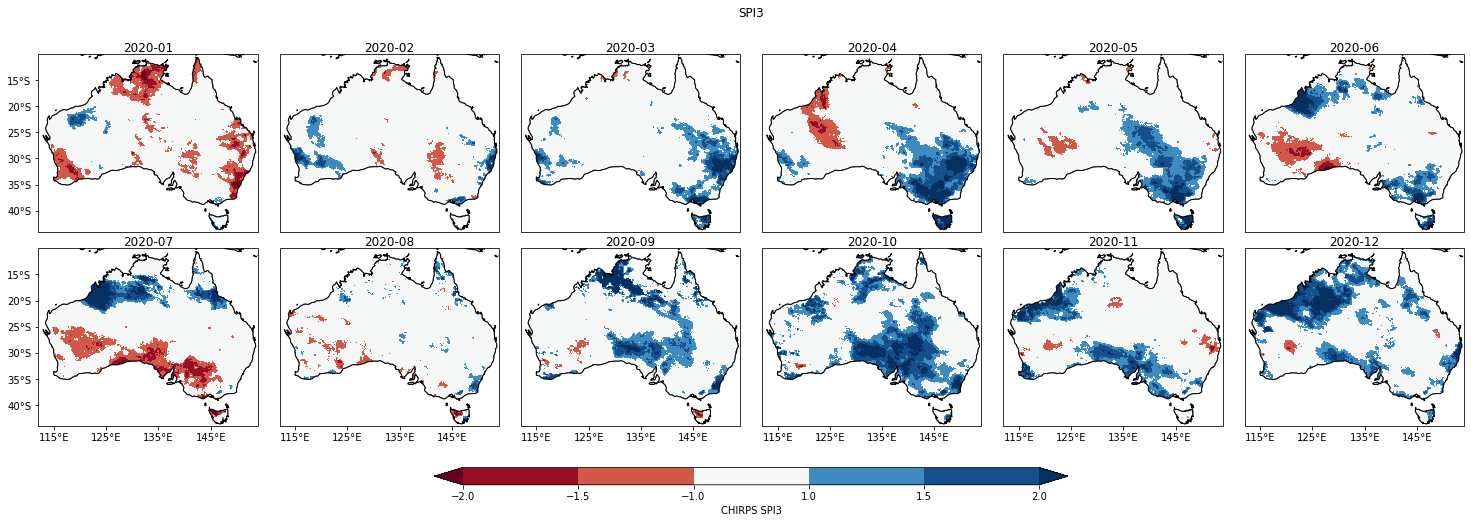

In [85]:
data_dir = '/g/data/w97/ad9701/drought_2017to2020/precip_data/SPI3_baseline_198101_202005/'

out_dir = 'figures/drought_2017to2020/precip/baseline_198101_202005/'
figname_prefix = 'v1_spi_3m'   # updating for figures with proper country borders
fname_prefix = 'SPI3'
vname = 'SPI3'

time_slice = slice('2017-01-01', '2020-12-31')

cmap = 'RdBu'
levels = [-2, -1.5, -1, 1, 1.5, 2]
main_title = vname

data_dir = '/g/data/w97/ad9701/drought_2017to2020/precip_data/'
out_dir = 'figures/drought_2017to2020/precip/baseline_198101_202005/'

for d in ['mswep', 'agcd', 'chirps']:
    for year in [2017, 2018, 2019, 2020]:#range(2003, 2022):
        if d =='agcd':
            fname = glob.glob(data_dir + 'SPI3_baseline_198101_202005/' + fname_prefix + '*' + d  + '*.nc')
            ds = xr.open_mfdataset(fname)
        else:
            fname = glob.glob(data_dir + 'SPI3_baseline_198101_202005/' + fname_prefix + '*' + d  + '*.nc')[0]
            ds = xr.open_dataset(fname)
        da = ds[vname].sel(time = slice(str(year), str(year))).load()
        # ds_mask = xr.open_dataset(data_dir + d + '_land_mask.nc')
        # da = da*ds_mask['land_mask']

        lat_size = abs((ds.lat[0]-ds.lat[-1]).values)
        lon_size = abs((ds.lon[0]-ds.lon[-1]).values)
        aspect = lon_size/lat_size

        da_plot = da.groupby('time.month').mean().rename(d + ' ' + vname + ' ' + str(year))
        plot_list = [da_plot.sel(month=i) for i in da_plot.month.values]
        subplot_title = np.datetime_as_string(da.time.values, unit='M')

        out_figname = figname_prefix + '_' + str(year) + '_bymon' + '_' + d + '.png'
        draw_spatial_plot_12panels(ds_list = plot_list, cmap = cmap, levels = levels, subplot_title = subplot_title, main_title = main_title, out_dir = out_dir, out_figname = out_figname, add_cbar = True, cbar_label = d.upper() + ' ' + vname)

        # da_plot = da.groupby('time.month').mean().rename(d + ' ' + vname + ' ' + str(year))#.plot(x = "lon", y = "lat", col = "month", col_wrap = 6, aspect = aspect, size = 3, cmap = "RdBu", levels = levels) #"RdBu_r") "YlGnBu"
        # plt.savefig(out_dir + figname_prefix + '_' + str(year) + '_bymon' + '_' + d + '.png')
        # del ds, fname

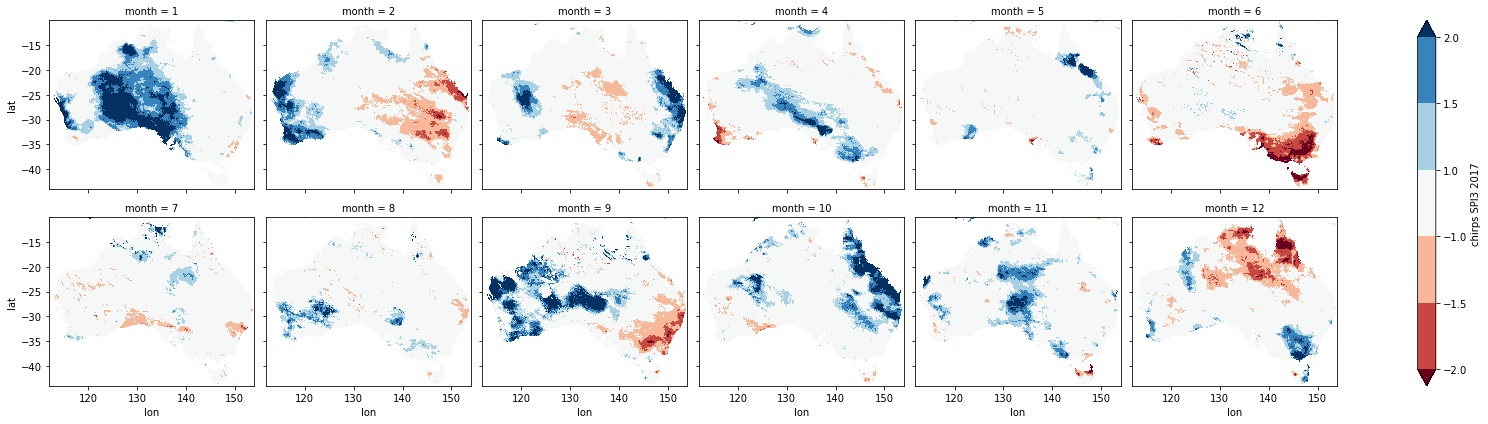

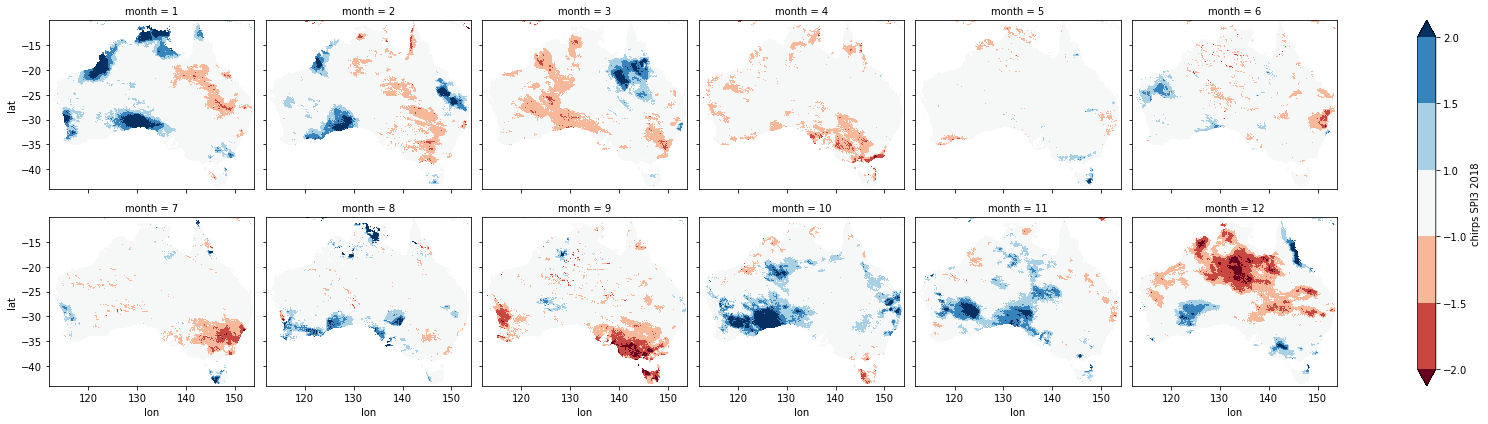

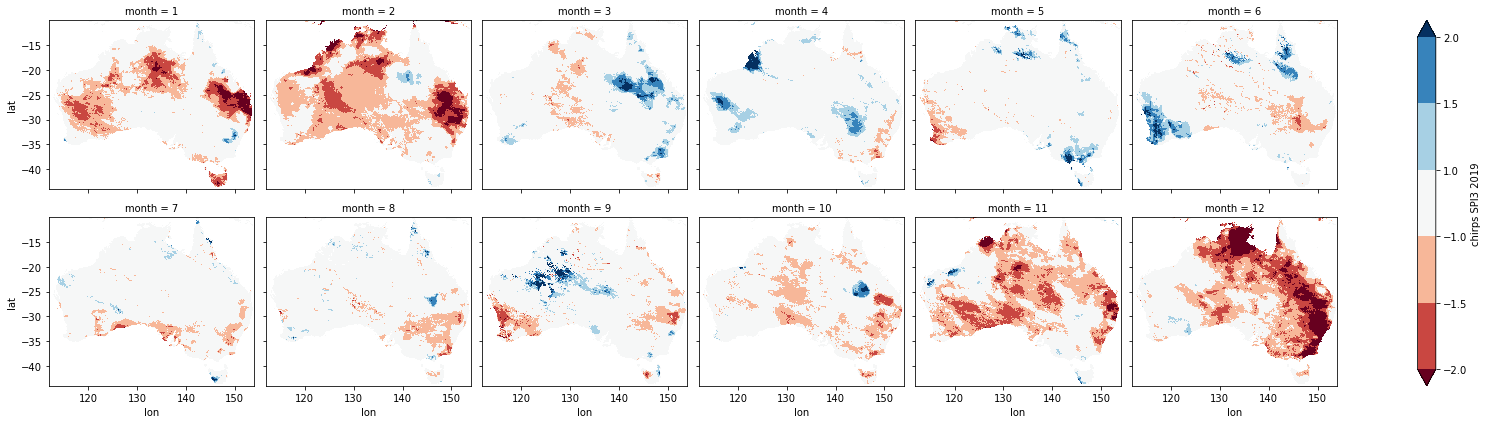

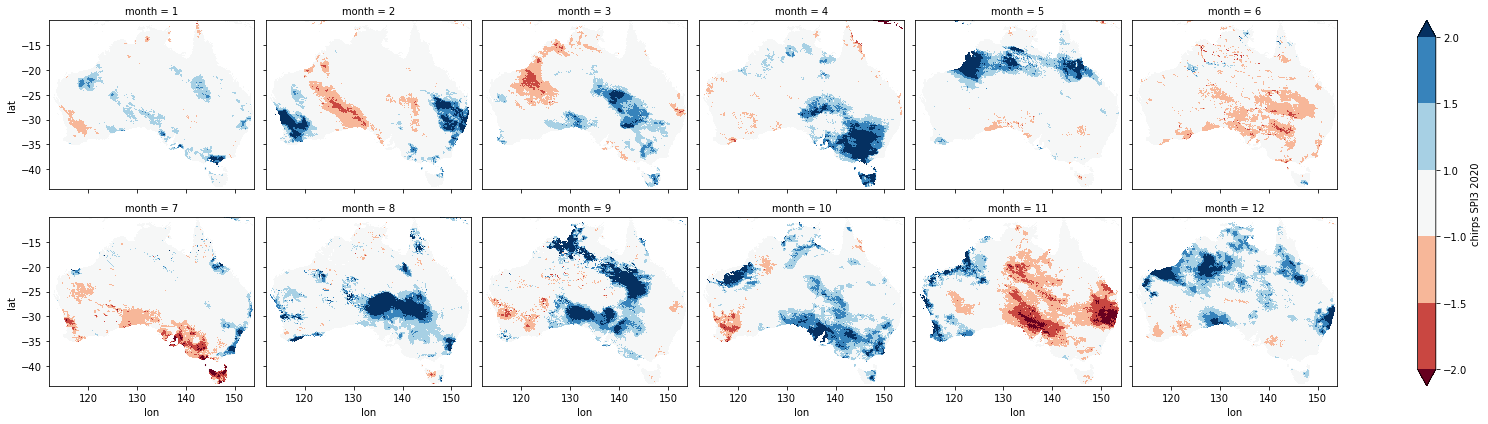

In [14]:
ds_chirps_zscore = xr.open_dataset(data_dir + 'zscore_chirps_monthly_1981_2021.nc')
for year in [2017, 2018, 2019, 2020]:#range(2003, 2022):
    
    da = ds_chirps_zscore['zscore'].sel(time = slice(str(year), str(year))).load()
    ds_mask = xr.open_dataset(data_dir + d + '_land_mask.nc')
    #da = da*ds_mask['land_mask']
    
    lat_size = abs((da.lat[0]-da.lat[-1]).values)
    lon_size = abs((da.lon[0]-da.lon[-1]).values)
    aspect = lon_size/lat_size

    da.groupby('time.month').mean().rename(d + ' ' + vname + ' ' + str(year)).plot(x = "lon", y = "lat", col = "month", col_wrap = 6, aspect = aspect, size = 3, cmap = "RdBu", levels = levels) #"RdBu_r") "YlGnBu"
    plt.savefig(out_dir + 'chirps_zscore_' + str(year) + '_bymon' + '_' + d + '.png')

In [5]:
data_name = ['MSWEP', 'AGCD', 'CHIRPS']
spi_list_dry = []
spi_list_dry_byyear = []
spi_list_dry_JJAS = []
spi_list_dry_JJAS_byyear = []
mon_sel = [6, 7, 8, 9]

dry_thresh = -1  # values below this threshold are atleast moderately dry (WMO document)
time_slice = slice('2017-01-01', '2019-12-31')
vname = 'SPI3'

data_list = [ds_mswep, ds_agcd, ds_chirps]
for i_ds in range(len(data_list)):
    ds = data_list[i_ds]
    da1 = ds[vname].where(ds[vname]<= dry_thresh).sel(time = time_slice).count('time').rename('count months')
    da1_year = ds[vname].where(ds[vname]<= dry_thresh).sel(time = time_slice).groupby('time.year').count('time').rename('count months')
    da1 = da1*mask_list[i_ds]
    da1_year = da1_year*mask_list[i_ds]
    spi_list_dry.append(da1)
    spi_list_dry_byyear.append(da1_year)
    del da1, da1_year
    
    da1_temp = ds[vname].where(ds[vname]<= dry_thresh).sel(time = time_slice)
    da1 = da1_temp.sel(time=da1_temp.time.dt.month.isin(mon_sel)).count('time').rename('count months')
    da1_year = da1_temp.sel(time=da1_temp.time.dt.month.isin(mon_sel)).groupby('time.year').count('time').rename('count months')
    da1 = da1*mask_list[i_ds]
    da1_year = da1_year*mask_list[i_ds]
    spi_list_dry_JJAS.append(da1)
    spi_list_dry_JJAS_byyear.append(da1_year)
    del da1, da1_year

In [12]:
len(spi_list_dry_byyear)

3

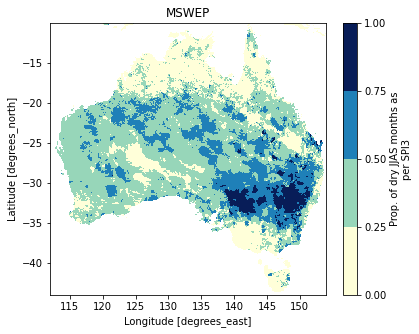

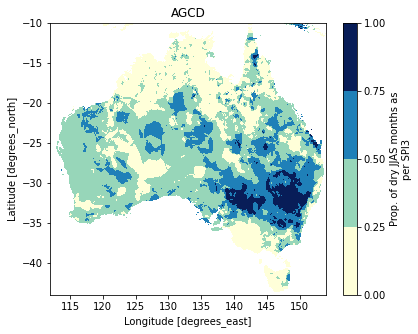

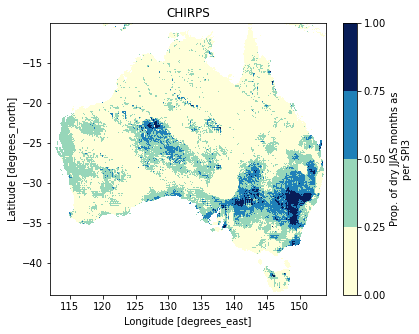

In [13]:
plot_list = spi_list_dry_JJAS
total_months = 4*3
new_varname = 'Prop. of dry JJAS months as per SPI3'
fig_prefix = 'Prop_dry_JJAS_months_asper_spi3'

levels = [0, 0.25, 0.5, 0.75, 1.0001]

for idata in range(len(data_name)):
    lat_size = abs((plot_list[idata].lat[0]-plot_list[idata].lat[-1]).values)
    lon_size = abs((plot_list[idata].lon[0]-plot_list[idata].lon[-1]).values)
    aspect = lon_size/lat_size

    (plot_list[idata]/total_months).rename(new_varname).plot(x = "lon", y = "lat", aspect = aspect, size = 5, levels = levels, cmap = "YlGnBu") #, cmap = "RdBu", levels = levels
    plt.title(data_name[idata])
    plt.savefig(fig_dir + fig_prefix + '_' + data_name[idata] + '.png')

In [15]:
spi_list_dry_JJAS_byyear[0]

<xarray.DataArray (year: 3, lat: 340, lon: 420)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * lon      (lon) float64 112.1 112.2 112.3 112.4 ... 153.7 153.8 153.9 153.9
  * lat      (lat) float64 -10.05 -10.15 -10.25 -10.35 ... -43.75 -43.85 -43.95
  * year     (year) int64 2017 2018 2019

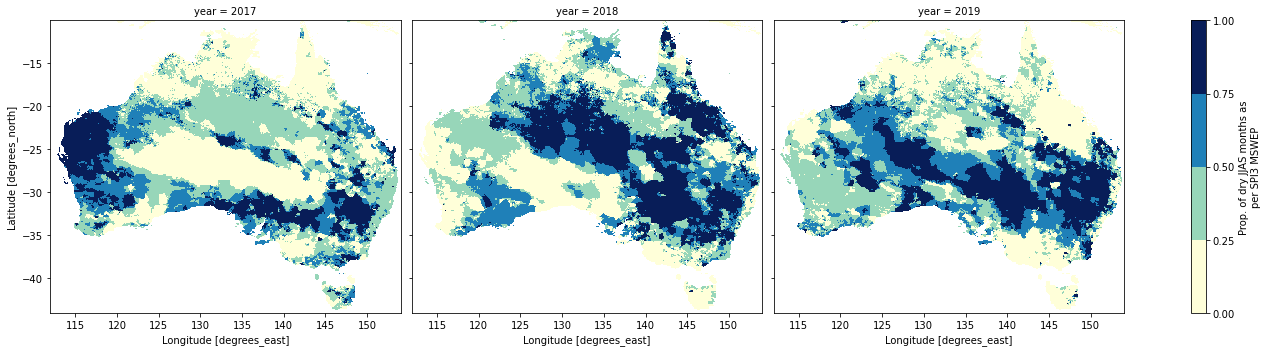

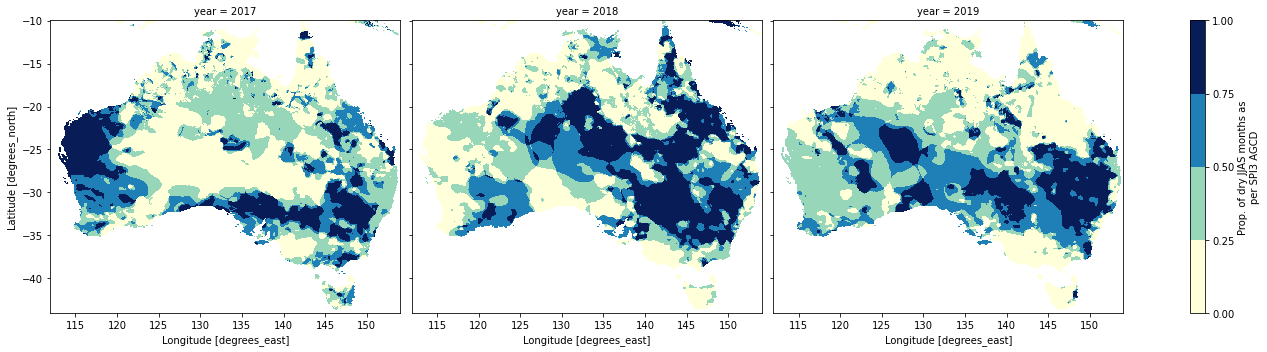

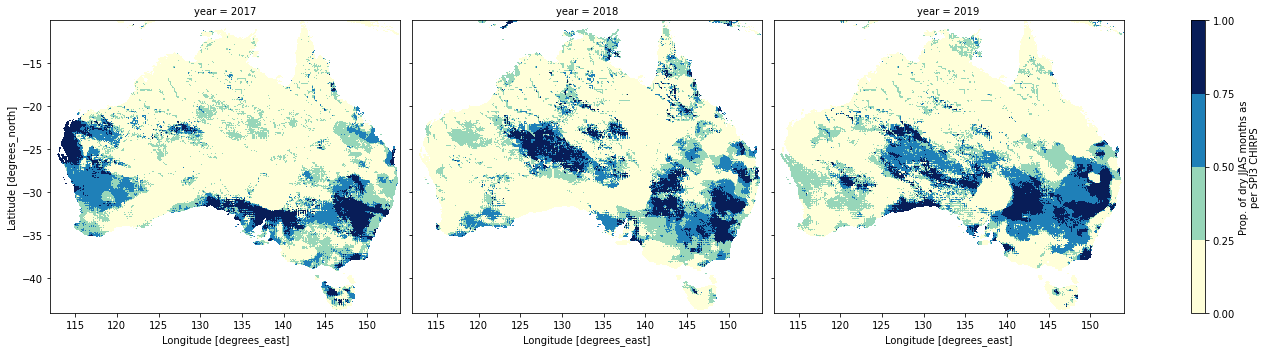

In [18]:
plot_list = spi_list_dry_JJAS_byyear
total_months = 4
new_varname = 'Prop. of dry JJAS months as per SPI3'
fig_prefix = 'Prop_dry_JJAS_months_asper_spi3_byyear'

levels = [0, 0.25, 0.5, 0.75, 1.0001]

for idata in range(len(data_name)):
    lat_size = abs((plot_list[idata].lat[0]-plot_list[idata].lat[-1]).values)
    lon_size = abs((plot_list[idata].lon[0]-plot_list[idata].lon[-1]).values)
    aspect = lon_size/lat_size

    (plot_list[idata]/total_months).rename(new_varname + ' ' + data_name[idata]).plot(x = "lon", y = "lat", aspect = aspect, size = 5, levels = levels, cmap = "YlGnBu", col="year") #, cmap = "RdBu", levels = levels
    # plt.title(data_name[idata])
    plt.savefig(fig_dir + fig_prefix + '_' + data_name[idata] + '.png')

In [6]:
data_dir

'/g/data/w97/ad9701/drought_2017to2020/precip_data/SPI3_baseline_198101_202005/'

In [13]:
# save the proportion of dry months into a pickle object; to be used for analysis to determine the focus region

# list objects to be saved
# spi_list_dry
# spi_list_dry_byyear
# spi_list_dry_JJAS
# spi_list_dry_JJAS_byyear

import pickle

out_file1 = data_dir + 'spi_list_dry.pickle'
with open(out_file1, 'wb') as handle:
    pickle.dump(spi_list_dry, handle)
    
out_file1 = data_dir + 'spi_list_dry_byyear.pickle'
with open(out_file1, 'wb') as handle:
    pickle.dump(spi_list_dry_byyear, handle)
    
out_file1 = data_dir + 'spi_list_dry_JJAS.pickle'
with open(out_file1, 'wb') as handle:
    pickle.dump(spi_list_dry_JJAS, handle)
    
out_file1 = data_dir + 'spi_list_dry_JJAS_byyear.pickle'
with open(out_file1, 'wb') as handle:
    pickle.dump(spi_list_dry_JJAS_byyear, handle)